## Total Vehicle Sales
The Federal Reserve Bank of St. Louis publishes data on total vehicle sales in the United States. Find and download total vehicle sales between 1 January 1976 and 1 November 2019 the data from the following link: https://fred.stlouisfed.org/series/TOTALNSA. Use the data to answer the following questions.</br> </br>
a. Describe the trend in vehicle sales over time. </br> </br>
b. Using only the downloaded data, what would you predict is the total vehicle sales in December 2019? May 2020? </br> </br>
c. What would you predict is the total vehicle sales for all of 2020? Provide support for your prediction. </br> </br>
d. Suppose ACME Trucks represents 1% of the total vehicle sales in 2019. Executives at ACME Trucks are planning to add 10% more staff in 2020. </br> </br>
Using your predictions of vehicle sales, provide a recommendation to ACME Trucks regarding their staffing plan and commentary on potential errors in your recommendation.

In [1]:
import warnings
import itertools

import pandas as pd
import numpy as np
from scipy.integrate import quad
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('TOTALNSA.csv', parse_dates=True, index_col='DATE', sep=',')
df.index.freq ='MS'
df.columns = ['y']

## Describe the trend in vehicle sales over time

Text(0.5, 1.0, 'Monthly vehicle sales in the United States')

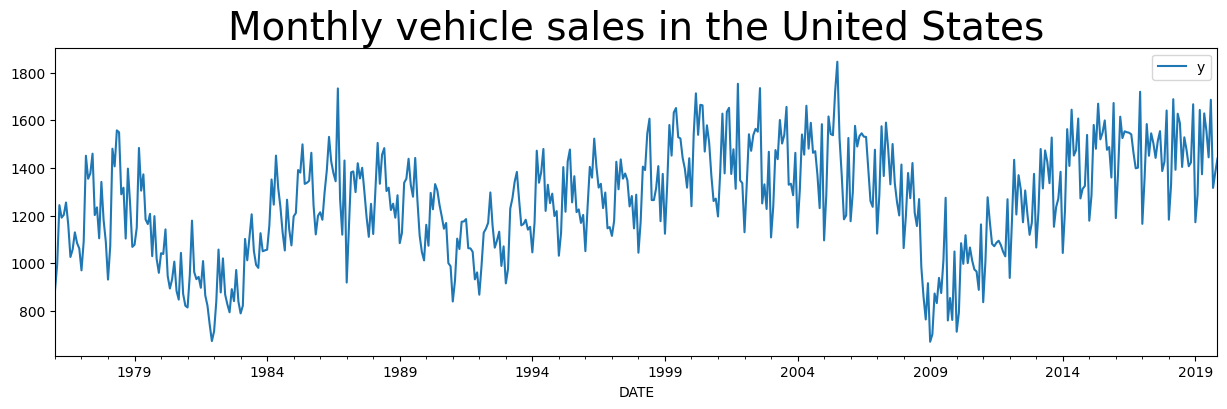

In [3]:
# plot the data by date
pd.set_option('display.float_format', lambda x: '%.1f' % x)

df.plot(figsize=(15, 4))
plt.title('Monthly vehicle sales in the United States', size=28)

In [4]:
df['index_month'] = df.index.month

In [5]:
df.head()

,y,index_month
DATE,,
1976-01-01,885.2,1
1976-02-01,994.7,2
1976-03-01,1243.6,3
1976-04-01,1191.2,4
1976-05-01,1203.2,5


d:\anaconda3\envs\datascience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\datascience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\datascience\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


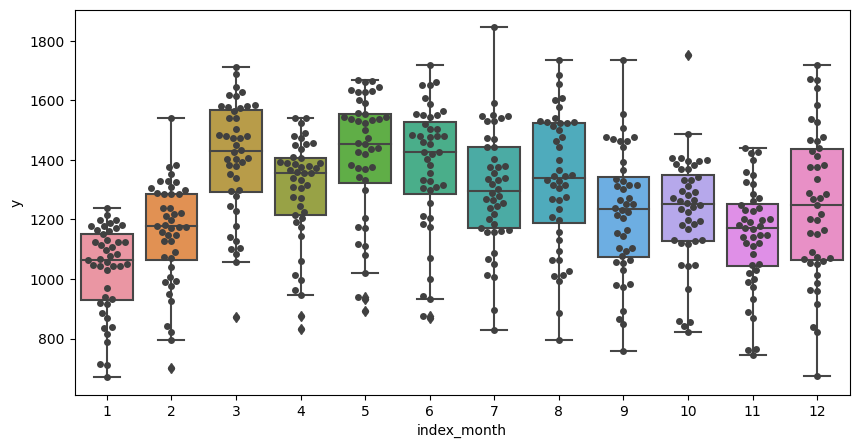

In [6]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="index_month", y="y", data=df)
ax = sns.swarmplot(x="index_month", y="y", data=df, color=".25")

In [7]:
summary_stats = df.groupby('index_month').describe()

In [8]:
summary_stats

y                                               
            count   mean   std   min    25%    50%    75%    max
index_month                                                     
1            44.0 1032.9 149.5 670.5  928.2 1064.6 1152.6 1239.3
2            44.0 1156.3 175.3 701.6 1063.2 1176.6 1286.8 1539.3
3            44.0 1402.6 193.9 872.8 1290.6 1430.0 1565.8 1713.0
4            44.0 1295.9 179.7 832.6 1213.1 1354.6 1406.9 1542.1
5            44.0 1407.6 216.8 893.8 1323.7 1453.6 1554.6 1669.7
6            44.0 1375.3 217.5 868.4 1286.4 1426.2 1526.1 1720.0
7            44.0 1300.6 199.9 827.4 1170.0 1296.0 1442.7 1845.7
8            44.0 1329.9 225.4 794.0 1187.4 1338.8 1523.7 1735.0
9            44.0 1221.7 209.5 759.6 1072.6 1235.0 1343.6 1733.6
10           44.0 1226.8 184.5 822.0 1128.6 1253.2 1347.9 1753.2
11           44.0 1144.6 175.5 743.0 1042.9 1169.5 1251.8 1439.3
12           43.0 1246.5 251.4 673.2 1065.2 1249.2 1435.8 1719.6

In [9]:
# drop index_month column
df.drop('index_month', inplace=True, axis=1)

``` desc
Overall, the mean of the vehicle sales is trending upward with periodical drops.
There is a strong seasonality trend.
The average value or the mean of the residuals seem to be zero. 

<Figure size 640x480 with 0 Axes>

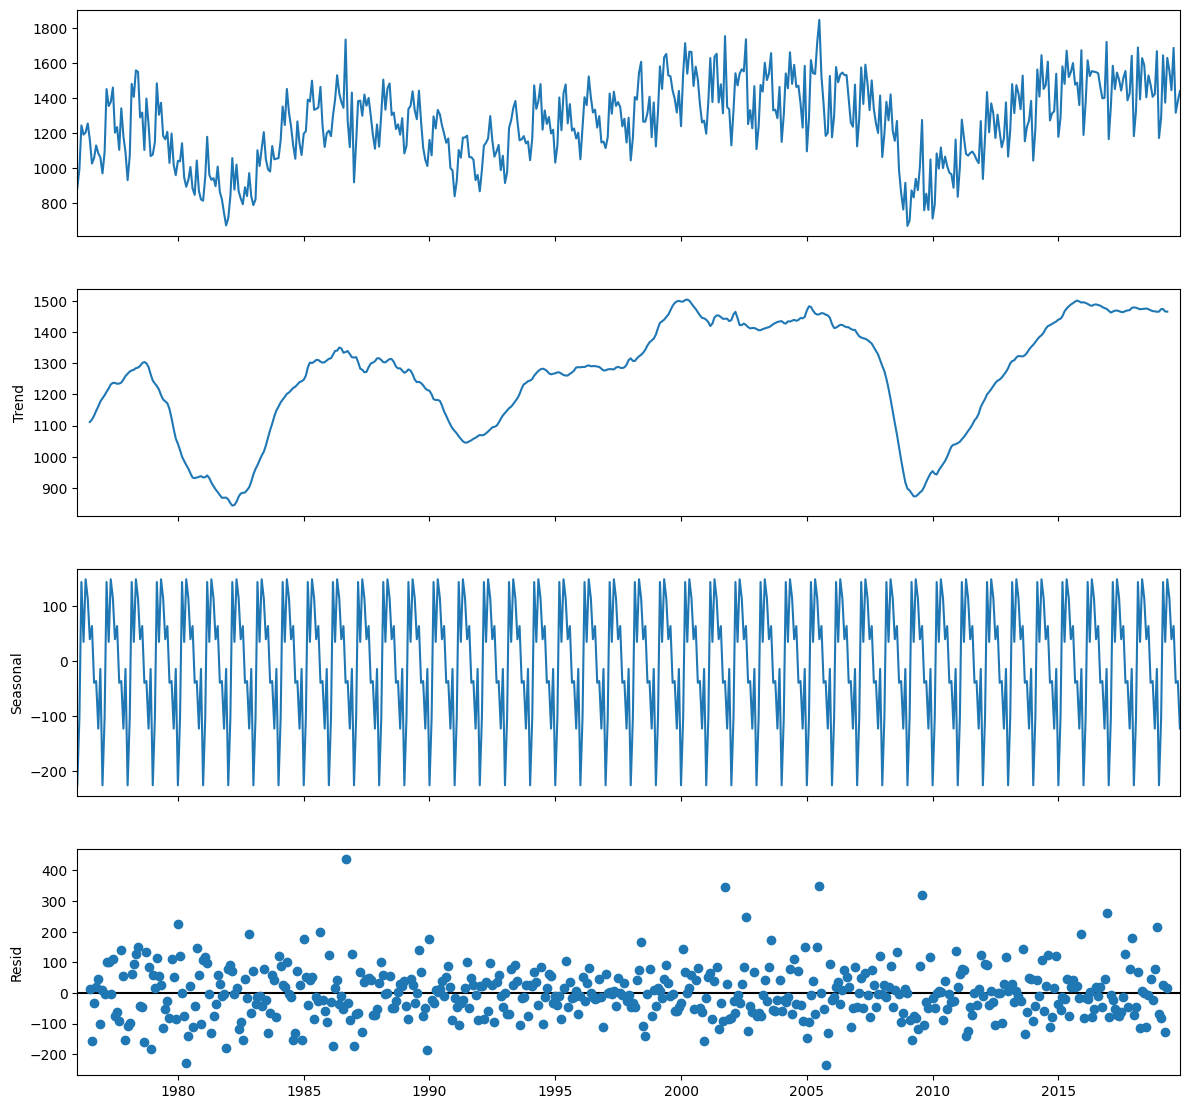

In [10]:
# decompose the data
decomposition = seasonal_decompose(df, period=12)
figure = plt.figure()
figure = decomposition.plot() 
figure.set_size_inches(13, 12)

```desc
The decomposition plot shows the observed trend, seasonal component, and residuals for your time series data. Here's a quick summary of each:

Observed: The original time series data, showing the overall trend with seasonal variations.
Trend: This captures the long-term movement in the data, smoothing out seasonal fluctuations.

Seasonal: The repeating patterns occurring at specific intervals (monthly, in this case), revealing any recurring effects within each year.

Residual: The remaining variations after removing the trend and seasonal components, representing the unexplained noise.

Long-term trends:

The second plot (Trend) isolates the long-term direction of the data. It reveals that the data had periods of increase and decrease over time, with some large dips and recoveries. This is the part of the data that is influenced by factors that cause gradual changes over time (for example, market growth or economic cycles).

Regular seasonal changes:

The third plot (Seasonal) shows the repeating pattern. This part of the data is driven by seasonal effects—things that happen in a regular, predictable way over time. For example, sales might increase during the holiday season each year. The consistent up-and-down pattern here indicates that the data is influenced by these seasonal cycles.

Random fluctuations:

The fourth plot (Residual) shows the remaining variation after removing both the trend and the seasonal components. These random fluctuations represent unpredictable events or noise that don’t follow any pattern. This part is the result of sudden, irregular changes that can’t be explained by trends or seasonality (for example, random spikes in sales due to unexpected events).

In summary:

Long-term trends are captured in the second plot.
Regular seasonal changes are isolated in the third plot.
Random fluctuations are shown in the fourth plot.

<Axes: xlabel='DATE'>

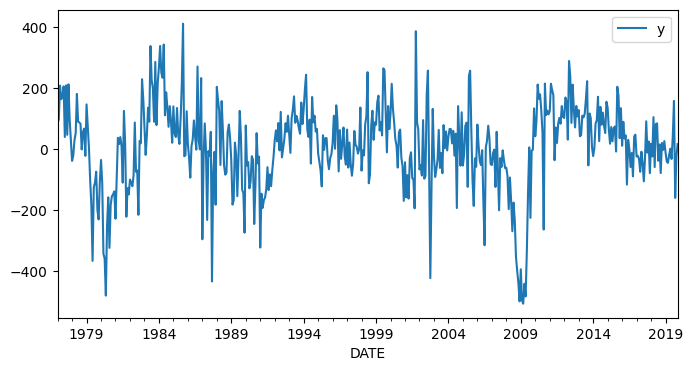

In [11]:
# take 12 month differences
diff_12 = (df - df.shift(12)).dropna()
diff_12.plot(figsize=(8, 4))

The data after seasonal difference also appear to be non-stationary, so take an additional first difference.

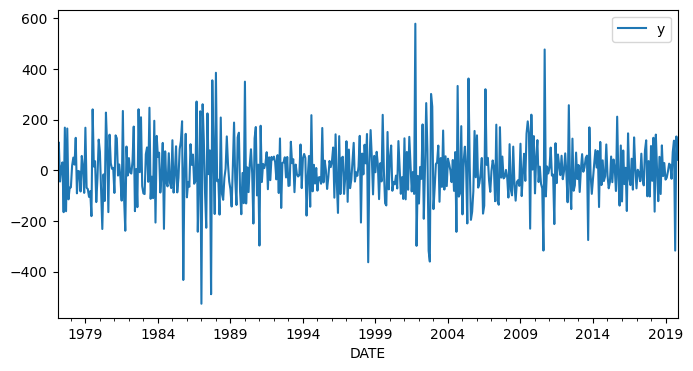

In [12]:
# take an additional first difference

diff_12_1 = (diff_12 - diff_12.shift(1)).dropna()
diff_12_1.plot(figsize=(8, 4));

In [13]:
df['diff_12'] = diff_12

In [14]:
df['diff_12_1'] = diff_12_1

In [15]:
from statsmodels.tsa.stattools import adfuller

# Perform the Dickey-Fuller test on the seasonally differenced data
adf_result = adfuller(df['diff_12_1'].dropna())

# Display the test statistic and p-value
adf_statistic = adf_result[0]
p_value = adf_result[1]

adf_statistic, p_value

(-8.364565091372544, 2.7652295949332985e-13)

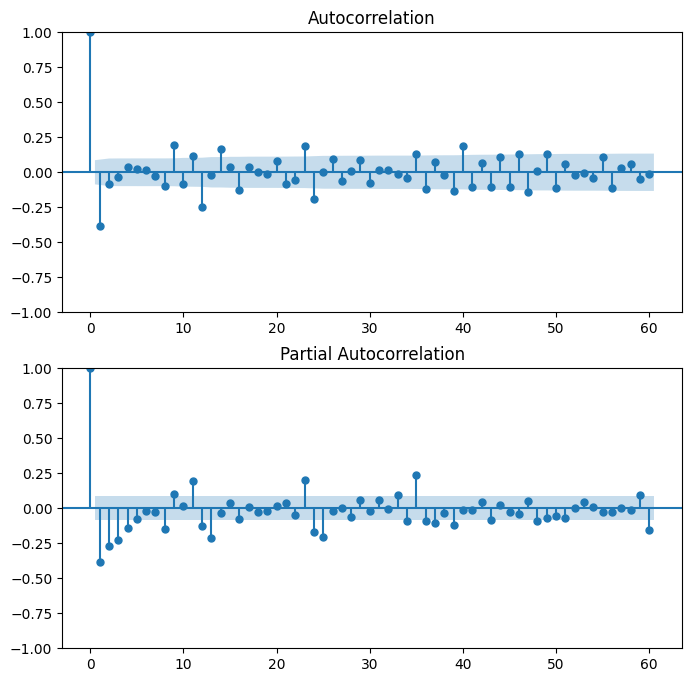

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
plot_acf(diff_12_1, lags=60, ax=ax1)
plot_pacf(diff_12_1, lags=60, ax=ax2)
plt.show()

```desc
Find an appropriate ARIMA model based on the ACF and PACF shown above

The significant spike at lag 1 in the ACF suggests a non-seasonal MA(1) component, and the significant spike at lag 12 in the ACF suggests a seasonal MA(1) component.

The significant spike at lag 1,2,3,4 in the PACF suggests a non-seasonal AR(4) component, and the significant spike at lag 12 in the PACF suggests a seasonal AR(1) component.

I will begin with an ARIMA(4,1,1)(1,1,1)12 model, indicating a first difference and a seasonal difference, non-seasonal MA(1) component and seasonal MA(1) component, and non-seasonal AR(4) component and seasonal AR(1) component.

```desc
The model captures both regular month-to-month patterns and yearly patterns, making it a good choice for forecasting data with both short-term and seasonal (annual) influences.

In [17]:
df = df.drop(['diff_12', 'diff_12_1'], axis= 1)

In [18]:
# fit model
model = sm.tsa.statespace.SARIMAX(df,order=(4,1,1), seasonal_order=(1,1,1,12))
ARIMAresult = model.fit(maxiter=100)
print(ARIMAresult.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  527
Model:             SARIMAX(4, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3053.766
Date:                            Fri, 27 Dec 2024   AIC                           6123.533
Time:                                    19:47:21   BIC                           6157.471
Sample:                                01-01-1976   HQIC                          6136.834
                                     - 11-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3984      0.035     11.448      0.000       0.330       0.467
ar.L2          0.1534      0.044   

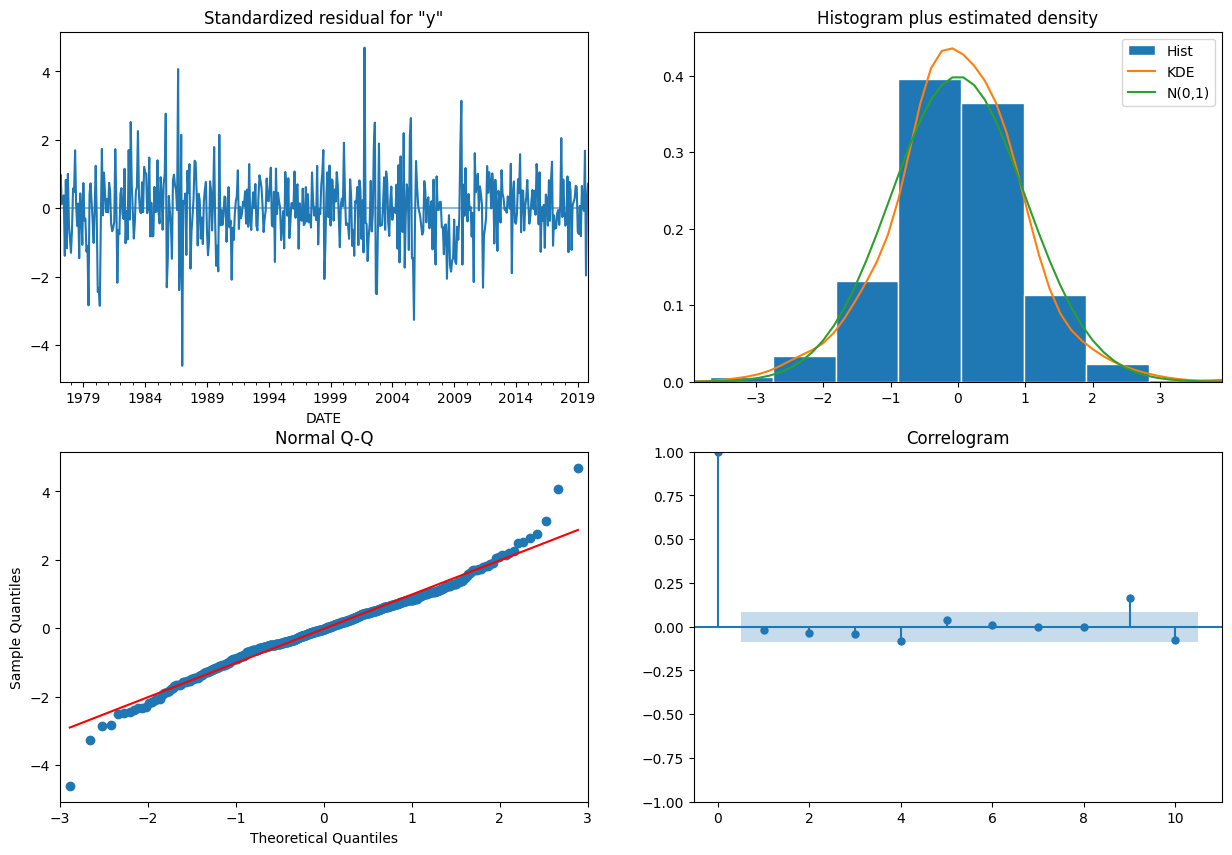

In [20]:
ARIMAresult.plot_diagnostics(figsize=(15, 10))
plt.show()

d:\anaconda3\envs\datascience\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['full_results']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


(540.0, 600.0)

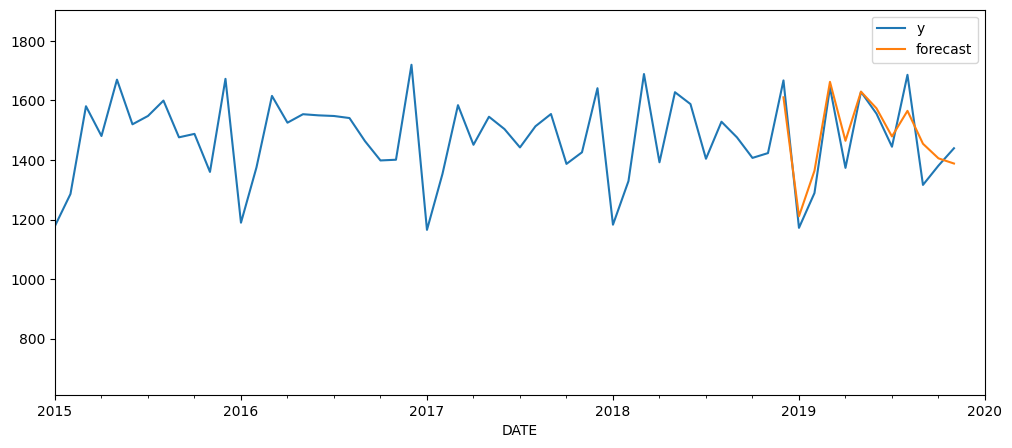

In [21]:
df['forecast'] = ARIMAresult.predict(start = 515, end= 527, dynamic= True, full_results=True)  
df.plot(figsize= (12,5))
plt.xlim('2015-01-01', '2020-01-01')

In [22]:
mae = mean_absolute_error(df['y'][-12:], df['forecast'][-12:])
mape = mae/(df['y'][-12:]).mean()*100

print('MAE - mean absolute error is {}'.format(round(mae, 1)))
print('MAPE - mean absolute percentage error is {}%'.format(round(mape, 1)))

MAE - mean absolute error is 55.7
MAPE - mean absolute percentage error is 3.8%


In [23]:
fcast = ARIMAresult.get_forecast(13).summary_frame(alpha=0.1)
fcast

y,mean,mean_se,mean_ci_lower,mean_ci_upper
2019-12-01,1626.7,90.7,1477.5,1775.9
2020-01-01,1178.5,97.7,1017.7,1339.2
2020-02-01,1331.8,101.8,1164.3,1499.3
2020-03-01,1642.5,107.4,1465.8,1819.2
2020-04-01,1440.3,114.6,1251.8,1628.8
2020-05-01,1620.5,119.2,1424.5,1816.5
2020-06-01,1555.1,123.0,1352.8,1757.4
2020-07-01,1480.4,126.7,1272.0,1688.9
2020-08-01,1619.7,130.1,1405.6,1833.7
2020-09-01,1385.8,133.1,1166.9,1604.7


In [24]:
# 2019 total sales (first 11 months actual sales plus December forecast sales)
sales_2019 = (df['y'][-11:].sum() + fcast['mean'][:1]).values[0]

# 2020 total sales from forecast
forecast_2020 = fcast['mean'][1:].sum()

print('Sales in 2019 --- {}'.format(sales_2019))
print('Sales in 2020 --- {}'.format(forecast_2020))

Sales in 2019 --- 17555.639987729523
Sales in 2020 --- 17642.007674564367


### Assumption- ACME represents 1% of the total sales again in 2020

In [25]:
# calculate ACME sales in 2019 and 2020

ACME_2019 = sales_2019 * 0.01
ACME_2020 = forecast_2020 * 0.01
print('ACME sales in 2019 --- {}'.format(ACME_2019))
print('ACME sales in 2020 --- {}'.format(ACME_2020))

ACME sales in 2019 --- 175.55639987729523
ACME sales in 2020 --- 176.42007674564368


In [26]:
increase = round((ACME_2020 - ACME_2019)/ACME_2019 * 100 , 2)
increase

0.49